# Plot from csv file

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
sns.set_theme(style="whitegrid")

def plot_name_mapping(name):
    if "unprivileged" in name:
        return "PPO"
    elif "md" in name:
        return "PPO-p" + name.split("md")[1].split("_")[0]

def plot(df, sr_score, sr_score_noisy=None, changing_wind=True, title="Evaluation Power"):
    # Plot with std
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    #sns.barplot(x='Name', y='eval/total_power', data=df, ci='eval/total_power_std') 
    #ax.get_yaxis().set_major_formatter(
    #    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for i, row in df.iterrows():
        name = plot_name_mapping(row["Name"])
        y = row['eval/total_power'] if changing_wind else row['eval/total_power_max']
        yerr = row['eval/total_power_std'] if changing_wind else None
        yerr = None
        plt.bar(name, y, yerr=yerr)

    
    # Add horizontal line with std
    # sr_y = sr_score.mean()
    # plt.axhline(sr_y, color='red', linestyle='-')
    # if sr_score_noisy is not None:
    #     sr_y_noisy = sr_score_noisy.mean()
    #     plt.axhline(sr_y_noisy, color='blue', linestyle='-')
    # plt.legend(['SR', 'SR_noisy'])
    # plt.axhline(0.1, color='black', linestyle='--')
    plt.xlabel('Models')
    plt.ylabel('Evaluation')
    #ylabel shows range 10000000 to 1000000000
    # plt.yscale('log')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

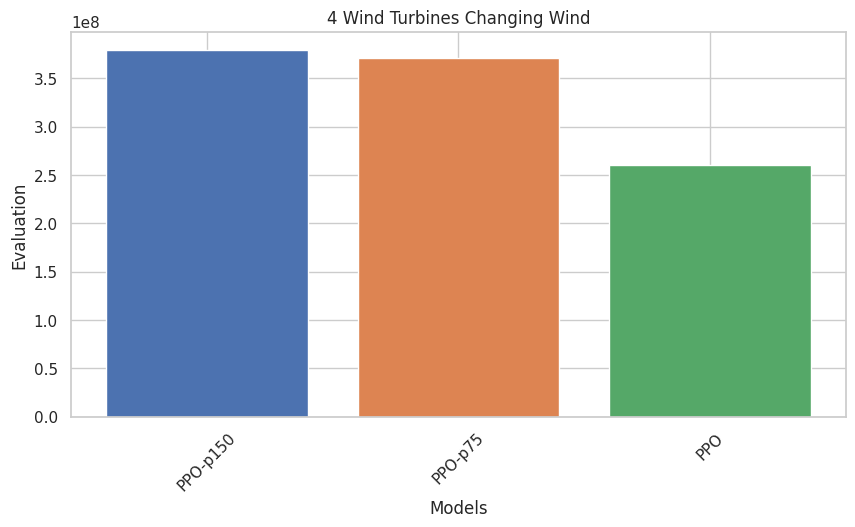

In [93]:
# load csv
df = pd.read_csv('data/wandb_downloads/4wt_cw.csv')
x = np.load("data/SR_proportional_powers.npy").sum(axis=1)
x2 = np.load("data/SR_proportional_noisy_powers.npy").sum(axis=1)
plot(df, x, sr_score_noisy=x2, title="4 Wind Turbines Changing Wind")

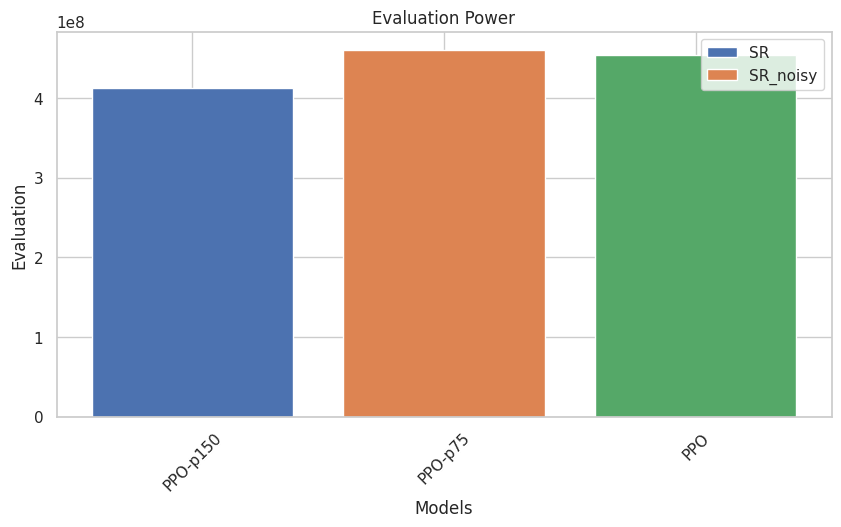

In [78]:
# load csv
df = pd.read_csv('data/wandb_downloads/4wt.csv')
x = np.load("data/SR_proportional_powers.npy")[:, -1]
x2 = np.load("data/SR_proportional_noisy_powers.npy")[:, -1]
plot(df, x, sr_score_noisy=x2, changing_wind=False)